# 📊 Titanic Mini Exploratory Data Analysis – Task 3  
### Data Science with Python Internship

---

## 📌 Project Overview

This project is part of the Data Science with Python Internship – Task 3 at Maincrafts Technology.

The objective of this task is to perform a Mini Exploratory Data Analysis (EDA) on the Titanic dataset using advanced data cleaning techniques, group-based analysis, and visualizations to gain deeper insights into passenger survival patterns.

---
## 🎯 Objectives

- Clean the Titanic dataset  
- Handle missing values using imputation  
- Remove irrelevant columns  
- Perform group-based survival analysis  
- Analyze survival patterns by age group, embarkation port, and family size  
- Create professional visualizations  

---
## 🛠️ Tools and Technologies

- Programming Language: Python  
- Libraries: Pandas, NumPy, Matplotlib, Seaborn  
- Environment: Jupyter Notebook / Google Colab  
---

## 📂 Dataset

- Name: Titanic Dataset  
- Source: Kaggle  
- Description: The dataset contains passenger details such as age, gender, passenger class, family size, embarkation port, and survival status.
---

## ✅ Task Status

- Dataset Loaded  
- Missing Values Handled  
- Irrelevant Columns Removed  
- Feature Engineering Completed  
- Exploratory Data Analysis Performed  
- Visualizations Created  
- Task Completed Successfully  


#**Loading Datset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df=pd.read_csv('Titanic-Dataset.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#**Cleaning the Dataset**

In [6]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**There are 177 null values in age, 687 in cabin and 2 in Embarked**

---



for the task, based on instruction, we gonna do following for data cleaning:
- **Fill missing Age with mean.**
- **Drop irrelevant columns (like Cabin).**

**1.** First we going to drop Cabin column entirely as it did not provides any
significant information

In [7]:
titanic_df.drop('Cabin',axis=1,inplace=True)

**2.** Now we are going to fill missing age with mean age

In [8]:
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].mean())

**3.** for Embarked, its only 2 values so we going to fill it with mode as thats a port from which most passengers embarked

In [9]:
titanic_df['Embarked']=titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [10]:
titanic_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#**Analysis Questions:**

##**1) Survival rate by Age Group.**

First we are going to add age groups

In [11]:
def Age_group(x):
  if x>=60:
    return '60+'
  elif x>=50:
    return '50-60'
  elif x>=40:
    return '40-50'
  elif x>=30:
    return '30-40'
  elif x>=20:
    return '20-30'
  else:
    return '<20'

Applying function to dataframe to get new column of age group

In [12]:
titanic_df['Age Group']=titanic_df['Age'].apply(Age_group)

In [13]:
#Checking if function is applied or not
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,30-40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,20-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,30-40
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,30-40
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,20-30
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,50-60
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,<20
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,20-30
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,<20


In [14]:
titanic_df.groupby('Age Group')['Survived'].value_counts()

Age Group  Survived
20-30      0           268
           1           129
30-40      0            94
           1            73
40-50      0            55
           1            34
50-60      0            28
           1            20
60+        0            19
           1             7
<20        0            85
           1            79
Name: count, dtype: int64

In [15]:
titanic_df.groupby('Age Group')['Survived'].mean().mul(100).round(2)

,Survived
Age Group,
20-30,32.49
30-40,43.71
40-50,38.20
50-60,41.67
60+,26.92
<20,48.17


**Interpretation:**

from above, we can say that old peoples and teens has highest survival rate compare to other, which indicated that children and old ones got priority for evacuation. 60+ age group people has lowest survival rate.

---

---



##**2) Survival rate by Embarkation Port.**

here we going to do groupby on Embarked port and calculate mean of survival

In [16]:
titanic_df.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64

In [17]:
titanic_df.groupby('Embarked')['Survived'].mean().mul(100).round(2)

,Survived
Embarked,
C,55.36
Q,38.96
S,33.90


**Interpretation:**

We can see, people who embarked from port 'C' have most survival rate which is 55.36% and then 'Q' which has 38.96% and 'S' which has 33.90%.


---



---



##**3) Survival rate by Family size (SibSp + Parch).**

first we gonna add Family size column

In [18]:
titanic_df['Family Size']=titanic_df['SibSp']+titanic_df['Parch']

In [19]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age Group,Family Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20-30,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,30-40,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,20-30,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,30-40,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,30-40,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,20-30,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,50-60,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,<20,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,20-30,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,<20,1


In [20]:
titanic_df.groupby('Family Size')['Survived'].value_counts()

Family Size  Survived
0            0           374
             1           163
1            1            89
             0            72
2            1            59
             0            43
3            1            21
             0             8
4            0            12
             1             3
5            0            19
             1             3
6            0             8
             1             4
7            0             6
10           0             7
Name: count, dtype: int64

In [21]:
titanic_df.groupby('Family Size')['Survived'].mean().mul(100).round(2)

,Survived
Family Size,
0,30.35
1,55.28
2,57.84
3,72.41
4,20.00
5,13.64
6,33.33
7,0.00
10,0.00


**Interpretation:**

we can clearly see that, smaller family sizes has high survival rate (50% + survival rate) compared to bigger family sizes ( hardly 30% survival rate) and its obvious that its easy to save smaller size families compare to bigger size families.

---



---






#**Visualizations:**

- **Age distribution (histogram).**

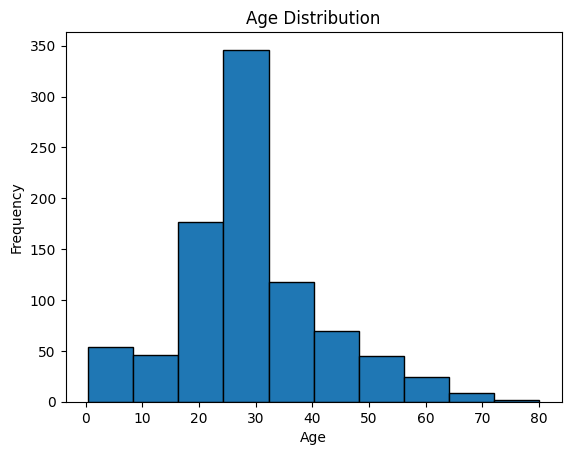

In [22]:
plt.figure()
data=titanic_df['Age']
plt.hist(data,bins=10,edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**

most of the passengers are from Age 20 to Age 40. means Middle age peopels are more in ship

---



---



- **Heatmap of correlations.**

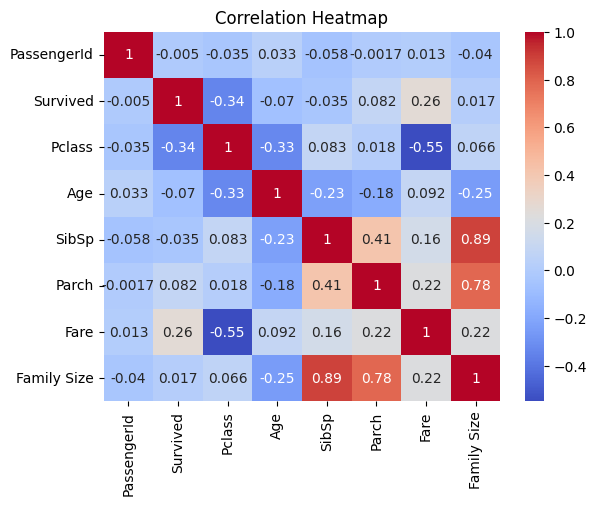

In [23]:
plt.figure()
numeric_df = titanic_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



---



---



- **Survival by family size (bar plot).**

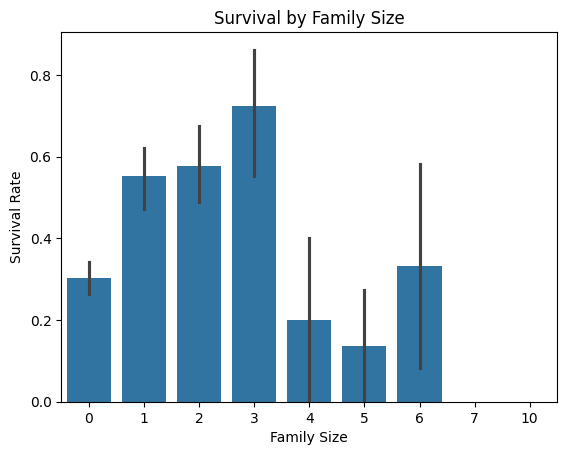

In [30]:
plt.figure()
sns.barplot(x='Family Size', y='Survived', data=titanic_df)
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

**Interpretation:**

Family size of 3 survived the most and smaller families have high survival rate